<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_01_ChatGPT_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=35bb65dda0db28d77032d81f6b836404fe31e23b069701c90e4a365e4ff37598
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.3 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from numpy import pi

# q[0]의 상태값을 q[1]에 복사시키는 것, Quantum Teleportation
# 왜, 양자이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과가 있음

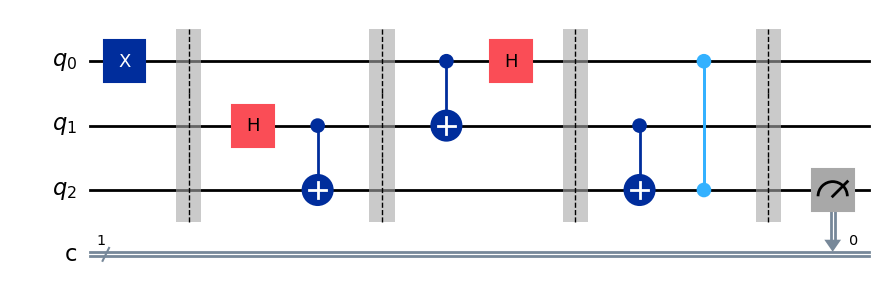

In [70]:
# 양자 회로 생성: 3 큐비트와 2 고전 비트 (Alice의 측정을 저장)
qc = QuantumCircuit(3, 1)

# 1. 전송할 양자 상태 |ψ> 준비 (예: 균등 초상태)
#qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.x(0)
qc.barrier()
# 2. Alice와 Bob의 얽힘 생성 (큐비트 1과 2)
qc.h(1)
qc.cx(1, 2)
qc.barrier()
# 3. Alice의 Bell 상태 측정 준비 (큐비트 0과 1)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
# 4. Alice의 큐비트 측정 및 고전 채널 전송
#qc.measure([0, 1], [0, 1])

# 5. Bob에서 측정 결과에 따른 보정 (제어 게이트)
#    조건에 따라 Bob의 큐비트(2)에 X, Z 게이트 적용
qc.cx(1, 2)
qc.cz(0, 2)
qc.barrier()

qc.measure([2],[0])
# 회로 시각화
qc.draw('mpl')

측정 결과: {'1': 1024}


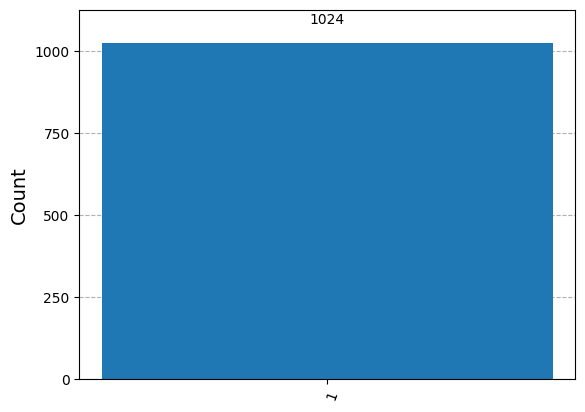

In [71]:
# 시뮬레이터 백엔드 설정
simulator = Aer.get_backend('qasm_simulator')

# 회로 컴파일 및 실행
compiled_circuit = transpile(qc, simulator)
#qobj = assemble(compiled_circuit, shots=1024)
result = simulator.run(compiled_circuit, shots=1024).result()

# 측정 결과 확인 (Alice의 측정값에 따른 결과)
counts = result.get_counts(qc)
print("측정 결과:", counts)

# 결과 히스토그램 시각화
plot_histogram(counts)


In [72]:
# 시뮬레이터 백엔드 설정
simulator = Aer.get_backend('statevector_simulator')

# 회로 컴파일 및 실행
compiled_circuit = transpile(qc, simulator)
#qobj = assemble(compiled_circuit, shots=1024)
result = simulator.run(compiled_circuit, shots=1024).result()

# 측정 결과 확인 (Alice의 측정값에 따른 결과)
statevector = result.get_statevector()
print("상태벡터:", statevector)

# 결과 히스토그램 시각화
#plot_state_city(statevector)


상태벡터: Statevector([0. +0.000000e+00j, 0. +0.000000e+00j, 0. +0.000000e+00j,
             0. +0.000000e+00j, 0.5-6.123234e-17j, 0.5-6.123234e-17j,
             0.5-6.123234e-17j, 0.5-6.123234e-17j],
            dims=(2, 2, 2))


In [73]:
print(statevector[0])

0j


In [74]:
print(statevector[2])

0j


In [75]:
# 두 상태 벡터 비교 (예: 유클리드 거리 계산)
euclidean_distance = np.linalg.norm(statevector[0] - statevector[2])
print("q[0]와 q[2]의 유클리드 거리:", euclidean_distance)

q[0]와 q[2]의 유클리드 거리: 0.0


In [67]:
# prompt: 위의 결과에서 q[0]와 q[2]의 상태벡터만을 출력한 후 이 두개의 값을 비교하는 코드를 작성해 주세요.

import numpy as np
# ... (이전 코드는 그대로 유지)

# 시뮬레이터 백엔드 설정
simulator = Aer.get_backend('statevector_simulator')

# 회로 컴파일 및 실행
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shot=12048).result()

# 상태 벡터 얻기
statevector = result.get_statevector()

# q[0]과 q[2]의 상태 벡터만 출력
def get_q_statevector(statevector, qubit_index):
  q_statevector = []
  for i in range(len(statevector)):
    binary_representation = bin(i)[2:].zfill(3)
    if binary_representation[qubit_index] == '0':
      q_statevector.append(statevector[i])

  return np.array(q_statevector)


q0_statevector = get_q_statevector(statevector, 0)
q2_statevector = get_q_statevector(statevector, 2)

print("q[0]의 상태벡터:", q0_statevector)
print("q[2]의 상태벡터:", q2_statevector)


# 두 상태 벡터 비교 (예: 유클리드 거리 계산)
euclidean_distance = np.linalg.norm(q0_statevector - q2_statevector)
print("q[0]와 q[2]의 유클리드 거리:", euclidean_distance)


q[0]의 상태벡터: [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
q[2]의 상태벡터: [0. +0.000000e+00j 0. +0.000000e+00j 0.5-6.123234e-17j 0.5-6.123234e-17j]
q[0]와 q[2]의 유클리드 거리: 0.7071067811865475
